## Background: "This dataset contains job postings from Glassdoor.com from 2017 with the following features It can be used to analyze the current trends based on job positions, company size, etc."

### The goal of this project is to clean the dataset to make it useful for analysis and perform Exploratory Data Analysis (EDA) on the cleaned dataset.

#### Link: https://www.kaggle.com/datasets/thedevastator/jobs-dataset-from-glassdoor

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading dataset
data = pd.read_csv('eda_data.csv', usecols=['Job Title', 'Salary Estimate', 'Job Description','Rating', 'Company Name',
                                           'Location', 'Size', 'Founded','Type of ownership', 'Industry',
                                           'Sector', 'Revenue','hourly','same_state', 'age'])

#Only certain columns where chosen due to two reasons: 
#1. Some columns were deemed not important for the purpose of 
#   Exploratory Data Analysis(EDA), such as the 'Unnamed: 0' columns, which, is just an index columns.
#2. Some columns were omitted to highlight data cleaning abilities.


In [3]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly,same_state,age
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,47
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,36
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,1,10
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,1,55
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,1,22


In [4]:
# Checking the amount of columns

# Cleaning the Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Size               742 non-null    object 
 7   Founded            742 non-null    int64  
 8   Type of ownership  742 non-null    object 
 9   Industry           742 non-null    object 
 10  Sector             742 non-null    object 
 11  Revenue            742 non-null    object 
 12  hourly             742 non-null    int64  
 13  same_state         742 non-null    int64  
 14  age                742 non-null    int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 87.1+ KB


### There are several columns from the dataset that need to be cleaned before Exploratory Data Analysis (EDA).

#### Cleaning the Location Data

In [6]:
#The Location Data will be separated into two columns, a state and a city column

#First, each state and city will be stored into their respective list variables.
state = []
city = []

for i in range(len(data["Location"])):
    if "Santa Fe Springs" in data['Location'][i]:
        city.append(data['Location'].str.split(',')[i][0].strip())
        state.append(data['Location'].str.split(',')[i][2].strip())
    else:
        city.append(data['Location'].str.split(',')[i][0].strip())
        state.append(data['Location'].str.split(',')[i][1].strip())

In [7]:
state[0:10]

['NM', 'MD', 'FL', 'WA', 'NY', 'TX', 'MD', 'CA', 'NY', 'NY']

In [8]:
city[0:10]

['Albuquerque',
 'Linthicum',
 'Clearwater',
 'Richland',
 'New York',
 'Dallas',
 'Baltimore',
 'San Jose',
 'Rochester',
 'New York']

#### There appears to be some whitespace in the state list, so we will strip any leading whitespaces with the .strip() method.
#### The same will also be done to the "city" list in case there are any leading whitespaces.

In [9]:
for i in range(len(state)):
    city[i] = city[i].strip()
    state[i] = state[i].strip()

#### Now that the location column has been separated, they will be added back to the main dataframe.

In [10]:
df_state = pd.DataFrame(state, columns=['State'])
df_city = pd.DataFrame(city, columns=['City'])

data = pd.concat([data, df_state, df_city],axis=1)

In [11]:
data.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly,same_state,age,State,City
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,47,NM,Albuquerque
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,36,MD,Linthicum
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,1,10,FL,Clearwater
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,1,55,WA,Richland
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,1,22,NY,New York


In [12]:
# There is no need for the Location column anymore since we separated the contents in that column to two new columns.
# Thus, "Location" will be dropped and the state and city column will be rearranged to that place

data.drop('Location', axis=1)

cols = ['Job Title', 'Salary Estimate', 'Rating', 'Company Name', 'State', 'City',
       'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'hourly', 'same_state', 'age']

data = data[cols]

In [13]:
# The Location column has been dropped and the State and City columns are found in its original place.
data.head()

,Job Title,Salary Estimate,Rating,Company Name,State,City,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly,same_state,age
0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,NM,Albuquerque,501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,47
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,MD,Linthicum,10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,36
2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,FL,Clearwater,501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,1,10
3,Data Scientist,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,WA,Richland,1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,1,55
4,Data Scientist,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\n2.9,NY,New York,51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,1,22


#### Next, the 'Job Title' column will be cleaned in order for it to be of use for EDA.

In [14]:
# There are 264 unique job titles 

data['Job Title'].nunique()

264

#### The goal will be to reduce the number of unique jobs by simplifying the Job Title.
#### For instance, if a job title has the words "Data Scientist" in it, and the full Job Title is "Healthcare Data Scientist," then 
#### the new title will be just "Data Scientist"

In [15]:
pd.set_option("display.max_rows", None)
data['Job Title'].value_counts()

Data Scientist                                                                                        131
Data Engineer                                                                                          53
Senior Data Scientist                                                                                  34
Data Analyst                                                                                           15
Senior Data Engineer                                                                                   14
Senior Data Analyst                                                                                    12
Lead Data Scientist                                                                                     8
Marketing Data Analyst                                                                                  6
Sr. Data Engineer                                                                                       6
Machine Learning Engineer                     

In [16]:
from collections import Counter

ex = data['Job Title'].tolist()

ex_count = Counter(ex)

print(ex_count.most_common(15)) #15 of the most common job Titles

[('Data Scientist', 131), ('Data Engineer', 53), ('Senior Data Scientist', 34), ('Data Analyst', 15), ('Senior Data Engineer', 14), ('Senior Data Analyst', 12), ('Lead Data Scientist', 8), ('Marketing Data Analyst', 6), ('Sr. Data Engineer', 6), ('Machine Learning Engineer', 5), ('Principal Data Scientist', 5), ('Research Scientist', 4), ('Medical Laboratory Scientist', 4), ('R&D Specialist/ Food Scientist', 4), ('Senior Research Scientist-Machine Learning', 4)]


#### We see from the list above that most of the Job Titles contain the phrases, "Data Scientist," "Data Engineer," and "Data Analyst".
#### Any job title that have these phrases will be simplified with that phrase.

In [17]:
data['Job Title'].head(10)

0               Data Scientist
1    Healthcare Data Scientist
2               Data Scientist
3               Data Scientist
4               Data Scientist
5               Data Scientist
6               Data Scientist
7               Data Scientist
8           Research Scientist
9               Data Scientist
Name: Job Title, dtype: object

In [18]:
jobTitles = []

for i in range(len(data['Job Title'])):
    if 'data scientist' in data['Job Title'][i].lower():
        jobTitles.append('Data Scientist')
    elif 'data analyst' in data['Job Title'][i].lower():
        jobTitles.append('Data Analyst')
    elif 'data engineer' in data['Job Title'][i].lower():
        jobTitles.append('Data Engineer')
    elif 'scientist' in data['Job Title'][i].lower():
        jobTitles.append('Scientist')
    elif 'machine learning' in data['Job Title'][i].lower():
        jobTitles.append('Machine Learning Engineer')
    elif 'manager' in data['Job Title'][i].lower():
        jobTitles.append('Manager')
    else:
        jobTitles.append('Other')

#### The 'Job Title' Column will be simplified to 7 job titles. Data Scientist, Data Analyst, Data Engineer, Scientist, Machine
#### Learning Engineer, Manager, and Other. The Scientist title refers to any sort of scientist position, such as a Biology Scientist or Research Scientist. The Manager refers to managerial positions. Finally, the Other title refers to any other job titles that do not meet the conditions in the code.

In [19]:
jobTitles[0:10]

['Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Scientist',
 'Data Scientist']

In [20]:
pd.Series(i for i in jobTitles).nunique() #264 unique values down to 7

7

In [21]:
ex2 = jobTitles

ex2_count = Counter(ex2)

print(ex2_count.most_common())

[('Data Scientist', 279), ('Scientist', 157), ('Data Engineer', 119), ('Data Analyst', 99), ('Other', 55), ('Manager', 21), ('Machine Learning Engineer', 12)]


In [22]:
df_jobTitles = pd.DataFrame(jobTitles, columns=['Job Title Simplified'])


data = pd.concat([data, df_jobTitles],axis=1)

In [23]:
data.drop('Job Title', axis=1)

cols = ['Job Title Simplified','Salary Estimate', 'Rating', 'Company Name', 'State',
       'City', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector',
       'Revenue', 'hourly', 'same_state', 'age']

data = data[cols]

In [24]:
data.head()

,Job Title Simplified,Salary Estimate,Rating,Company Name,State,City,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly,same_state,age
0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,NM,Albuquerque,501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,47
1,Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,MD,Linthicum,10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,36
2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,FL,Clearwater,501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,1,10
3,Data Scientist,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,WA,Richland,1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,1,55
4,Data Scientist,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\n2.9,NY,New York,51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,1,22


#### Cleaning the 'Salary Estimate' column

##### When cleaning the 'Salary Estimate' column there were instances were text in the string were not uniform with the other string values.
##### Thus, multiple conditions were created in the for loop to deal with these instances. Additionally, the numbers from the string were converted
##### into integer values. Furthermore, the integer values were then used to calculate the minimum salary and maximum salary in thousands of USD .

In [25]:
import re

In [26]:
min_salary = []
max_salary = []

#Note: the 260 used to multiply the hourly rate was the number of working days in 2022 in the United States of America (USA).

for i in range(len(data['Salary Estimate'])):
    if 'Per Hour' in data['Salary Estimate'][i]:
        if 'Employer Provided Salary' in data['Salary Estimate'][i]:
            min_salary.append((int(re.split(r'[-$P]', data['Salary Estimate'][i])[2]) * 8) * 260)
            max_salary.append((int(re.split(r'[-$P]', data['Salary Estimate'][i])[4].strip()) * 8) * 260)
        else:
            min_salary.append((int(re.split(r'[-$P]', data['Salary Estimate'][i])[1]) * 8) * 260)
            max_salary.append((int(re.split(r'[-$P]', data['Salary Estimate'][i])[3].strip()) * 8) * 260)
    elif 'Employer Provided Salary' in data['Salary Estimate'][i]:
        min_salary.append((int(re.split(r'[$K-]',data['Salary Estimate'][i])[1])*1000))
        max_salary.append((int(re.split(r'[$K-]',data['Salary Estimate'][i])[4])*1000))
        
    else:
        min_salary.append((int(re.split(r'[-K$]',data['Salary Estimate'][i])[1]) * 1000))
        max_salary.append((int(re.split(r'[-K$]',data['Salary Estimate'][i])[4]) * 1000))

In [27]:
#Concatenating the two lists, min_salary and max_salary, to the dataframe.
df_min_salary = pd.DataFrame(min_salary, columns=['Min_Salary'])
df_max_salary = pd.DataFrame(max_salary, columns=['Max_Salary'])

data = pd.concat([data, df_min_salary, df_max_salary],axis=1)

In [28]:
data.head()

,Job Title Simplified,Salary Estimate,Rating,Company Name,State,City,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly,same_state,age,Min_Salary,Max_Salary
0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,NM,Albuquerque,501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,47,53000,91000
1,Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,MD,Linthicum,10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,36,63000,112000
2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,FL,Clearwater,501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,1,10,80000,90000
3,Data Scientist,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,WA,Richland,1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,1,55,56000,97000
4,Data Scientist,$86K-$143K (Glassdoor est.),2.9,Affinity Solutions\n2.9,NY,New York,51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,1,22,86000,143000


In [29]:
#Dropping and reorganizing columns of the dataframe.

data.drop('Salary Estimate',axis=1)

cols = ['Job Title Simplified','Min_Salary', 'Max_Salary', 'Rating', 'Company Name', 'State',
       'City', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector',
       'Revenue', 'hourly', 'same_state', 'age']

data = data[cols]

In [30]:
data.head()

,Job Title Simplified,Min_Salary,Max_Salary,Rating,Company Name,State,City,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly,same_state,age
0,Data Scientist,53000,91000,3.8,Tecolote Research\n3.8,NM,Albuquerque,501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,47
1,Data Scientist,63000,112000,3.4,University of Maryland Medical System\n3.4,MD,Linthicum,10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,36
2,Data Scientist,80000,90000,4.8,KnowBe4\n4.8,FL,Clearwater,501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,1,10
3,Data Scientist,56000,97000,3.8,PNNL\n3.8,WA,Richland,1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,1,55
4,Data Scientist,86000,143000,2.9,Affinity Solutions\n2.9,NY,New York,51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,1,22


#### The next column to be cleaned will be the company name

In [31]:
# The primary thing that needs to be cleaned in the company name column is the '\n' string and the rating that is attached
# to it.
data['Company Name'] =  data['Company Name'].apply(lambda x: x.split('\n')[0])

In [32]:
data.head()


,Job Title Simplified,Min_Salary,Max_Salary,Rating,Company Name,State,City,Size,Founded,Type of ownership,Industry,Sector,Revenue,hourly,same_state,age
0,Data Scientist,53000,91000,3.8,Tecolote Research,NM,Albuquerque,501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,47
1,Data Scientist,63000,112000,3.4,University of Maryland Medical System,MD,Linthicum,10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,36
2,Data Scientist,80000,90000,4.8,KnowBe4,FL,Clearwater,501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),0,1,10
3,Data Scientist,56000,97000,3.8,PNNL,WA,Richland,1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,1,55
4,Data Scientist,86000,143000,2.9,Affinity Solutions,NY,New York,51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,1,22


#### The next column to be cleaned will be the Size column. The size column will be divided into two new columns.
#### Minimum_Size and Maximum_Size

In [33]:
min_employees = []
max_employees = []

for i in range(len(data['Size'])):
    if '+' in data['Size'][i]:
        min_employees.append(int(re.split(r'[+]',data['Size'][i])[0]))
        max_employees.append(int(re.split(r'[+]',data['Size'][i])[0]))
    elif 'to' in data['Size'][i]:
        min_employees.append(int(re.split(r'[toe]',data['Size'][i])[0]))
        max_employees.append(int(re.split(r'[toe]',data['Size'][i])[2]))
    else:
        min_employees.append(np.NaN)
        max_employees.append(np.NaN)

In [34]:
df_min_employees = pd.DataFrame(min_employees, columns=['Min_Employees'])
df_max_employees = pd.DataFrame(max_employees, columns = ['Max_Employees'])

data = pd.concat([data, df_min_employees, df_max_employees], axis =1)

In [35]:
data.columns

Index(['Job Title Simplified', 'Min_Salary', 'Max_Salary', 'Rating',
       'Company Name', 'State', 'City', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'same_state', 'age',
       'Min_Employees', 'Max_Employees'],
      dtype='object')

In [36]:
data.drop('Size', axis=1)

cols = ['Job Title Simplified', 'Min_Salary', 'Max_Salary', 'Rating',
       'Company Name', 'State', 'City', 'Min_Employees', 'Max_Employees', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'same_state', 'age']

data = data[cols]

In [37]:
data[data['Type of ownership'] == 'College / University' ]

,Job Title Simplified,Min_Salary,Max_Salary,Rating,Company Name,State,City,Min_Employees,Max_Employees,Founded,Type of ownership,Industry,Sector,Revenue,hourly,same_state,age
143,Scientist,81000,167000,2.6,Software Engineering Institute,PA,Pittsburgh,501.0,1000.0,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,0,1,36
181,Scientist,81000,159000,2.6,Software Engineering Institute,PA,Pittsburgh,501.0,1000.0,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,0,1,36
199,Scientist,81000,167000,2.6,Software Engineering Institute,PA,Pittsburgh,501.0,1000.0,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,0,1,36
276,Scientist,81000,159000,2.6,Software Engineering Institute,PA,Pittsburgh,501.0,1000.0,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,0,1,36
343,Scientist,81000,167000,2.6,Software Engineering Institute,PA,Pittsburgh,501.0,1000.0,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,0,1,36
371,Scientist,56000,91000,2.6,Software Engineering Institute,PA,Pittsburgh,501.0,1000.0,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,0,1,36
412,Data Scientist,82000,129000,3.7,Applied Research Laboratories,TX,Austin,501.0,1000.0,-1,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,0,1,-1
504,Scientist,81000,167000,2.6,Software Engineering Institute,PA,Pittsburgh,501.0,1000.0,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,0,1,36
557,Scientist,56000,91000,2.6,Software Engineering Institute,PA,Pittsburgh,501.0,1000.0,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,0,1,36
620,Data Scientist,82000,129000,3.7,Applied Research Laboratories,TX,Austin,501.0,1000.0,-1,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,0,1,-1


#### Next column to be cleaned is the 'Type of ownership' column. The goal is just to simply the categories in this column.

In [38]:
own = []

for i in range(len(data['Type of ownership'])):
    if 'Company' in data['Type of ownership'][i]:
        own.append(re.split(r'[-]',data['Type of ownership'][i])[1].strip())
    elif 'Other' in data['Type of ownership'][i]:
        own.append('Other')
    elif 'School' in data['Type of ownership'][i]:
        own.append('Other')
    elif 'Unknown' in data['Type of ownership'][i]:
        own.append('Other')
    elif '-1' in data['Type of ownership'][i]:
        own.append('Other')
    elif 'Subsidiary' in data['Type of ownership'][i]:
        own.append('Subsidiary')
    else:
        own.append(data['Type of ownership'][i])

In [39]:
df_own = pd.DataFrame(own, columns=['Ownership Type'])


data = pd.concat([data, df_own], axis = 1)

In [40]:
data.drop('Type of ownership', axis=1)

cols = ['Job Title Simplified', 'Min_Salary', 'Max_Salary', 'Rating',
       'Company Name', 'State', 'City', 'Min_Employees', 'Max_Employees',
       'Founded', 'Ownership Type','Industry', 'Sector', 'Revenue',
       'hourly', 'same_state', 'age']

data = data[cols]

In [41]:
data.head()

,Job Title Simplified,Min_Salary,Max_Salary,Rating,Company Name,State,City,Min_Employees,Max_Employees,Founded,Ownership Type,Industry,Sector,Revenue,hourly,same_state,age
0,Data Scientist,53000,91000,3.8,Tecolote Research,NM,Albuquerque,501.0,1000.0,1973,Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),0,0,47
1,Data Scientist,63000,112000,3.4,University of Maryland Medical System,MD,Linthicum,10000.0,10000.0,1984,Other,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),0,0,36
2,Data Scientist,80000,90000,4.8,KnowBe4,FL,Clearwater,501.0,1000.0,2010,Private,Security Services,Business Services,$100 to $500 million (USD),0,1,10
3,Data Scientist,56000,97000,3.8,PNNL,WA,Richland,1001.0,5000.0,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),0,1,55
4,Data Scientist,86000,143000,2.9,Affinity Solutions,NY,New York,51.0,200.0,1998,Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,0,1,22


#### The final column to be cleaned will be the "Revenue" column. If the column specifies a value range, such as 2 to 5 billion dollars, then the highest value will be kept.

In [42]:
data['Revenue'][0:10]

0           $50 to $100 million (USD)
1              $2 to $5 billion (USD)
2          $100 to $500 million (USD)
3    $500 million to $1 billion (USD)
4            Unknown / Non-Applicable
5              $1 to $2 billion (USD)
6            Unknown / Non-Applicable
7            $25 to $50 million (USD)
8    $500 million to $1 billion (USD)
9          $100 to $500 million (USD)
Name: Revenue, dtype: object

In [43]:
rev = []

for i in range(len(data['Revenue'])):
    if 'to' in data['Revenue'][i]:
        if 'million' in data['Revenue'][i]:
            if 'billion' in data['Revenue'][i]:
                rev.append(int(re.split(r'[$tomb]', data['Revenue'][i])[6].strip()) * 1000000000)
            else:
                rev.append(int(re.split(r'[$tom]', data['Revenue'][i])[4].strip()) * 1000000)
        elif 'billion' in data['Revenue'][i]:
            rev.append(int(re.split(r'[$tob]', data['Revenue'][i])[4].strip()) * 1000000000)
    elif '+' in data['Revenue'][i]:
        rev.append(int(re.split(r'[$+]', data['Revenue'][i])[1].strip()) * 1000000000)
    else:
        rev.append(np.NaN)
        

In [44]:
df_rev = pd.DataFrame(rev, columns = ['Revenue (USD)'])
data = pd.concat([data, df_rev], axis=1)

In [45]:
data.columns

cols = ['Job Title Simplified', 'Min_Salary', 'Max_Salary', 'Rating',
       'Company Name', 'State', 'City', 'Min_Employees', 'Max_Employees',
       'Founded', 'Ownership Type', 'Industry', 'Sector', 'Revenue (USD)',
       'hourly','same_state', 'age']

data = data[cols]

In [46]:
data.head()

,Job Title Simplified,Min_Salary,Max_Salary,Rating,Company Name,State,City,Min_Employees,Max_Employees,Founded,Ownership Type,Industry,Sector,Revenue (USD),hourly,same_state,age
0,Data Scientist,53000,91000,3.8,Tecolote Research,NM,Albuquerque,501.0,1000.0,1973,Private,Aerospace & Defense,Aerospace & Defense,1.000000e+08,0,0,47
1,Data Scientist,63000,112000,3.4,University of Maryland Medical System,MD,Linthicum,10000.0,10000.0,1984,Other,Health Care Services & Hospitals,Health Care,5.000000e+09,0,0,36
2,Data Scientist,80000,90000,4.8,KnowBe4,FL,Clearwater,501.0,1000.0,2010,Private,Security Services,Business Services,5.000000e+08,0,1,10
3,Data Scientist,56000,97000,3.8,PNNL,WA,Richland,1001.0,5000.0,1965,Government,Energy,"Oil, Gas, Energy & Utilities",1.000000e+09,0,1,55
4,Data Scientist,86000,143000,2.9,Affinity Solutions,NY,New York,51.0,200.0,1998,Private,Advertising & Marketing,Business Services,NaN,0,1,22


## Exploratory Data Analysis (EDA)

#### Finding the Top 5 states that have jobs with the highest paying salary

In [47]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [48]:
data.groupby(['State'])['Max_Salary'].max().nlargest(5).iplot(kind='bar')

#### Determining which top 5 cities offer the highest paying technology jobs.

In [49]:
data.groupby('City')['Max_Salary'].max().nlargest(5).iplot(kind='bar')

##### We see that for most of the top 5 cities with the highest paying job, are within their respective state. However, Mountain View, a city in California, is not within massachusetts.

In [50]:
data['State'].value_counts().nlargest(10).iplot(kind='bar', color='blue')

#### We see from the above plot, that roughly 44% of all tech related job postings come from the states, California, Massachusetts, and New York.

#### Now, the columns, 'Min_Salary,' 'Max_Salary,' 'Revenue (USD),' 'Min_Employees,' and 'Max_Employees', will be checked to see for any high correlations between the variables. Primarily, to see if the salary columns have any correlations with revenue and the number of employees that a company has.

In [51]:
df2 = data[['Min_Salary','Max_Salary','Revenue (USD)','Min_Employees','Max_Employees']].copy(deep=True)

<AxesSubplot: >

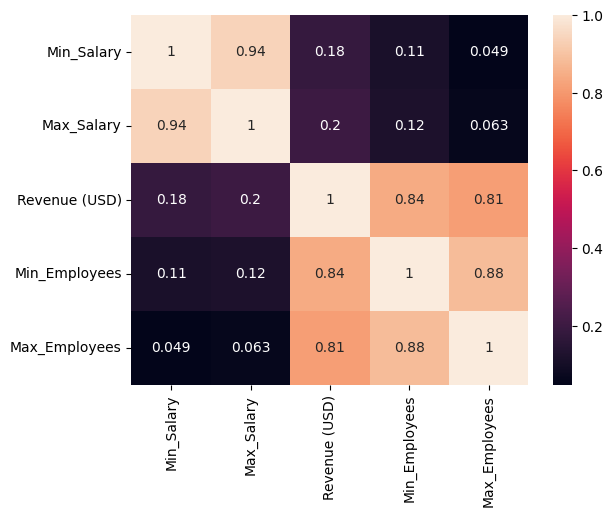

In [52]:
sns.heatmap(df2.corr(),annot=True)

#### We see from the above heatmap that the salary columns are only highly correlated with one another and the other three columns, 'Revenue (USD),' 'Min_Employees,' 'Max_Employees,' are highly correlated with one another. It can be deduced that more employees are correlated to higher revenue due to more workers being present to do work.

In [53]:
df3 = data[['Job Title Simplified','State', 'Sector','Min_Salary', 'Max_Salary']].copy(deep=True)

In [54]:
states = pd.get_dummies(data['State'],drop_first=True)

In [55]:
df3_state = pd.concat([states,data[['Min_Salary','Max_Salary']]],axis=1)

<AxesSubplot: >

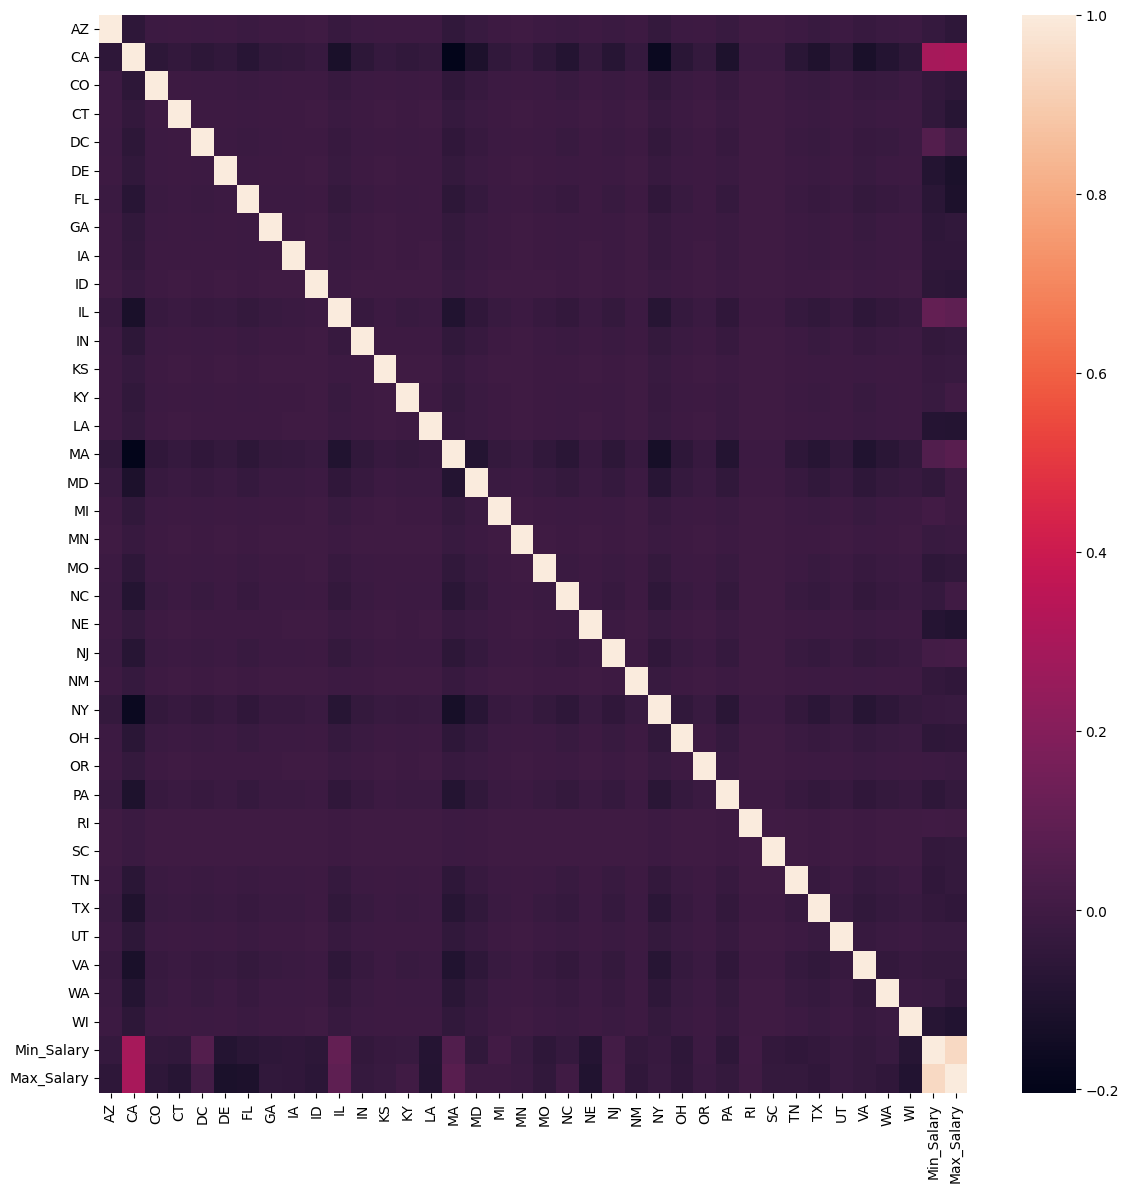

In [56]:
plt.figure(figsize=(14,14))
sns.heatmap(df3_state.corr())

#### We see from the above heatmap that the states that have the highest correlation with the salary columns are California, the capital (DC) , Illinois, and Massachusetts

<AxesSubplot: >

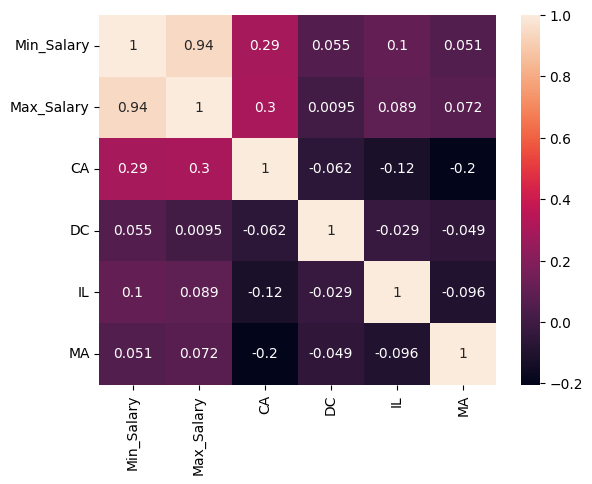

In [57]:
sns.heatmap(df3_state[['Min_Salary','Max_Salary','CA','DC','IL','MA']].corr(),annot=True)

#### By taking a closer look at the four states and their correlation with the salary columns, we see that states are still not highly correlated with the salary columns. California is the highest correlated state with the salary columns.

#### Now, the correlation between Sector and the salary columns will be checked

In [58]:
sector = pd.get_dummies(data['Sector'],drop_first=True)

In [59]:
df4_sector = pd.concat([sector,data[['Min_Salary','Max_Salary']]],axis=1)

<AxesSubplot: >

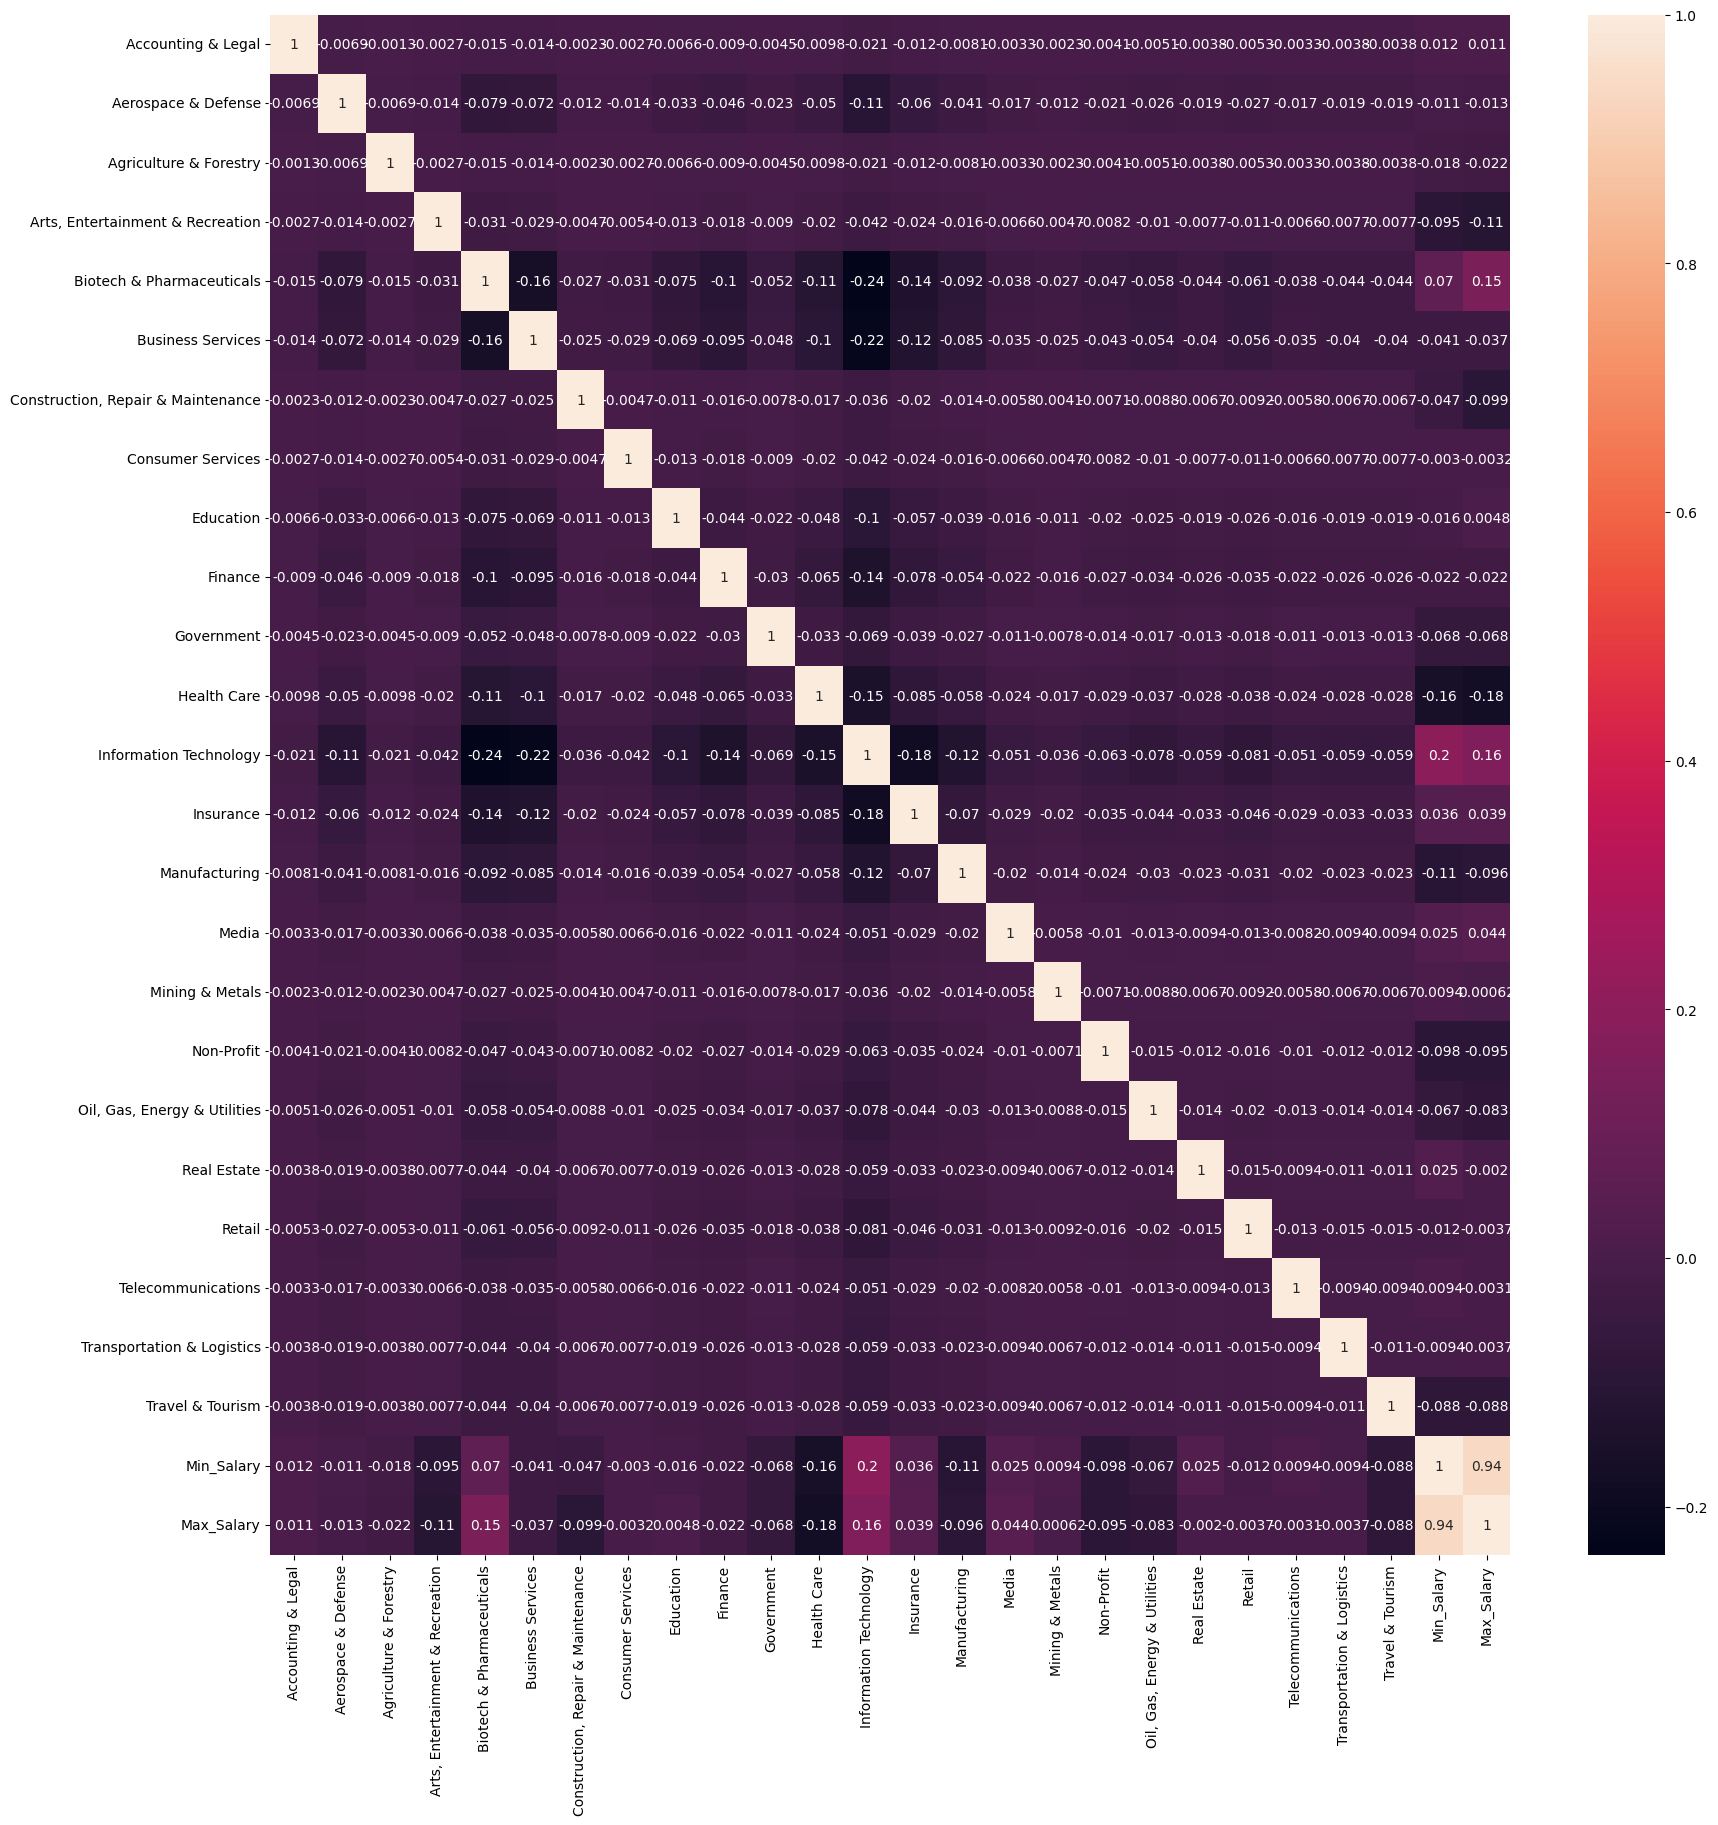

In [60]:
plt.figure(figsize=(20,20))
sns.heatmap(df4_sector.corr(),annot=True)

#### We see from the above heatmap that there are no sectors that are highly correlated with any of the two salary columns. The sector that is highly correlated with the two salary columns is the Information Technology

#### Finally, the correlation between the Job Title and the salary's column will be looked at.

In [61]:
job_titles = pd.get_dummies(data['Job Title Simplified'],drop_first=True)

In [62]:
df5_titles = pd.concat([job_titles,data[['Min_Salary','Max_Salary']]],axis=1)

<AxesSubplot: >

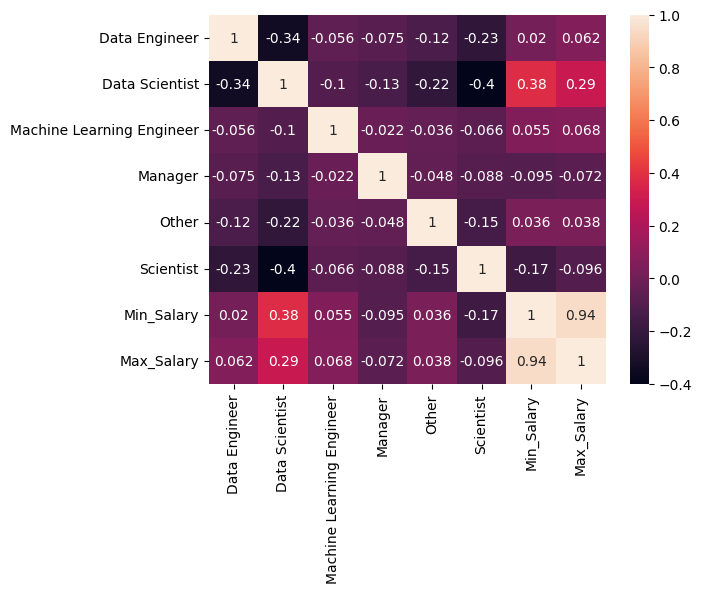

In [63]:
sns.heatmap(df5_titles.corr(),annot=True)

#### Based on the above heatmap,we see again that the Job Title categories are not highly correlated with the salaries columns. However, we do see that the Job Title, 'Data Scientist,' is the most highly correlated value to both of the salaries columns.

In [64]:
data['Job Title Simplified'].value_counts()

Data Scientist               279
Scientist                    157
Data Engineer                119
Data Analyst                  99
Other                         55
Manager                       21
Machine Learning Engineer     12
Name: Job Title Simplified, dtype: int64

##### We see that most of the entries in the data set are for Data Scientist positions. Thus, it can be deduced that most of the higher paying salaries are for Data Scientist roles.

### To conclude, the dataset needed to be extensively cleaned in order to be usable for Exploratory Data Analysis (EDA). After the dataset was cleaned, EDA was conducted in order to find any patterns with the dataset. Plots were created to quickly identify which states and cities offered tech positions with the highest paying salaries. Furthermore, the variables of interest were lowly correlated with the target salary variables. Furthermore, there is insufficient data to deduce the tech jobs that have the highest paying salaries due to most entries being for the Data Scientist Position (this was the case also for the other variables that were looked at). 